<a href="https://colab.research.google.com/github/Umesh1307/Play-Store-App-Reviews-Analysis---First-Capstone-Project---Umesh-Rathod/blob/main/Play_Store_App_Reviews_Analysis_First_Capstone_Project_Umesh_Rathod_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
## Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
## Explore and analyze the data to discover key factors responsible for app engagement and success

### Before deep-diving straight into the problem solution, we need to create a roadmap which we will be referring to throughout this exploratory data analysis.
### Google Play Store is a digital store managed and developed by Google, which provides services like installing applications for android and Chrome-based OS users.
### After installing applications some users give reviews and rating for the app they have used, this ratings and reviews defines the satisfaction of the customers, that's directly proportional to the performance of the app. So it is essential to analyze these ratings and reviews to improve the quality of service which will cater to the need of end-users.
### The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product. It is of 10k Play Store apps for analyzing the Android market. This dataset contains details of different applications and reviews from different users.
### Discussion of Google play store dataset will involve various steps such as
### 1. loading the data into the data frame
### 2. cleaning the data
### 3. extracting statistics from the dataset
### 4. exploratory analysis and visualizations
### 5. questions that can be asked from the dataset
### 6. conclusion

In [80]:
# Let's go importing all the store of weapons needed, just kidding!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(16,7)})
from pylab import rcParams


In [81]:
# Mount drive with google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1. As per the roadmap we have created let's put feet on the first step i.e loading the dataset into dataframe

In [82]:
# Create the directorial path for data
dir_path="/content/drive/MyDrive/Almabetter Project/Capstone - Projects/Module 1/Play Store App Review - Umesh Rathod"

In [83]:
# Let's read it
play_store_df=pd.read_csv(dir_path+ "/Play Store Data.csv")

In [84]:
#  Writing a small for loop to convert uppercase to lowercase and replacing the spaces with underscore
play_store_df.columns=[str(x).lower().replace(" ","_") for x in play_store_df.columns]

In [85]:
# Check data what it has from top !
play_store_df.head()

app  ...   android_ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]

In [86]:
# Check it from bottom
play_store_df.tail()

app  ...         android_ver
10836                               Sya9a Maroc - FR  ...          4.1 and up
10837               Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10838                         Parkinson Exercices FR  ...          2.2 and up
10839                  The SCP Foundation DB fr nn5n  ...  Varies with device
10840  iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[5 rows x 13 columns]

In [87]:
# Checking the shape of the play store data set.
print(f"The shape of the google play store data set is {play_store_df.shape}, where number of rows are  {play_store_df.shape[0]}  and {play_store_df.shape[1]} columns")

The shape of the google play store data set is (10841, 13), where number of rows are  10841  and 13 columns


In [88]:
# Dropping the features that we will not be using extensively
play_store_df=play_store_df.drop(['current_ver',"android_ver"],axis=1)

In [89]:
# Need to know the null values in each row of columns:
play_store_df.isnull().sum()

app                  0
category             0
rating            1474
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
dtype: int64

### As we can explicitly see that there are 1474 missing values in rating columns. We have to fill these values with proper calculation. . But the question is how to handle the rating columns because we can not assign those as median, mean, or mode as in real life ratings are given by the customers, We are now using forward linear interpolation to fill nan values inside the rating column.

In [90]:
# Missing Value Handling using interpolate forward linear method.
play_store_df.interpolate(method='linear',limit_direction='forward',inplace=True)

In [91]:
# Rechecking for null values
play_store_df.isnull().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              1
price             0
content_rating    1
genres            0
last_updated      0
dtype: int64

### As we can see there is one missing value in the content rating feature and one missing value inside type features, now we will be filling those two values with appropriate values.

In [92]:
# Filling NAN with suitable values
play_store_df['content_rating'].fillna(value='Everyone',inplace=True)
play_store_df['type'].fillna(value='Free',inplace=True)

In [93]:
# Final Check For Null Values.
play_store_df.isnull().sum().any()

False

In [94]:
# Let's have a look at the information 
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10841 non-null  object 
 1   category        10841 non-null  object 
 2   rating          10841 non-null  float64
 3   reviews         10841 non-null  object 
 4   size            10841 non-null  object 
 5   installs        10841 non-null  object 
 6   type            10841 non-null  object 
 7   price           10841 non-null  object 
 8   content_rating  10841 non-null  object 
 9   genres          10841 non-null  object 
 10  last_updated    10841 non-null  object 
dtypes: float64(1), object(10)
memory usage: 931.8+ KB


##Step 2. Mission Cleaning Starts here!
###After looking at the information about all data features in given data set, there is demand to work around data and make it useable flawlessly, Let's get down to business guys!

In [95]:
# Converting the into the proper data structure, though ratings are already a float64, just comfirming.
play_store_df['rating']=play_store_df['rating'].astype(str).astype(float)

In [96]:
# As we can see in play store info we need to typecast this to the proper integer
play_store_df['reviews']=play_store_df['reviews'].apply(lambda x:x.replace("3.0M","3000000"))
play_store_df['reviews']=play_store_df['reviews'].apply(lambda x: int(x))

In [97]:
# Just converting the number of installs into proper integer number
play_store_df=play_store_df[play_store_df['installs']!='Free']
play_store_df['installs']=play_store_df['installs'].apply(lambda x : x.replace("+","")if "+" in str(x) else x)
play_store_df['installs']=play_store_df['installs'].apply(lambda x: x.replace(",","") if "," in str(x) else x)
play_store_df['installs']=play_store_df['installs'].apply(lambda x: int(x))

In [98]:
# Price never be an object it should be a float
play_store_df['price']=play_store_df['price'].apply(lambda x: x.replace("$","") if "$" in str(x) else x)
play_store_df['price']=play_store_df['price'].apply(lambda x:float(x))

In [99]:
# Let's fix the size column
play_store_df['size']=play_store_df['size'].apply(lambda x : str(x).replace("Varies with device","NaN") if "Varies with device" in str(x) else x)
play_store_df['size']=play_store_df['size'].apply(lambda x:  str(x).replace("M","") if "M" in str(x) else x)
play_store_df['size']=play_store_df['size'].apply(lambda x:  float(str(x).replace("k",""))/1000 if "k" in str(x) else x)
play_store_df['size']=play_store_df['size'].apply(lambda x:  float(x))

In [100]:
# Fixing last updated object to proper datetime 
play_store_df['last_updated'].unique()
play_store_df['last_updated']=pd.to_datetime(play_store_df['last_updated'])

In [101]:
# Unique category 
len(play_store_df['category'].unique())

33

### Ah! Until now we have been thoroughly cleaning and fixing the data type as required, we havn't explored the single aspect of any features given in data set which will be influencing the result of performance altogether.

## Step 3. Extracting statistics from the dataset
### Here we will be doing some statistical analysis of data using pandas built-in method called describe(). Describe only works for the numerical features

In [102]:
# Let's take some statistical taste of play store dataframe:
play_store_df.describe()

rating       reviews         size      installs         price
count  10840.000000  1.084000e+04  9145.000000  1.084000e+04  10840.000000
mean       4.190567  4.441529e+05    21.516530  1.546434e+07      1.027368
std        0.517606  2.927761e+06    22.588748  8.502936e+07     15.949703
min        1.000000  0.000000e+00     0.008500  0.000000e+00      0.000000
25%        4.000000  3.800000e+01     4.900000  1.000000e+03      0.000000
50%        4.300000  2.094000e+03    13.000000  1.000000e+05      0.000000
75%        4.500000  5.477550e+04    30.000000  5.000000e+06      0.000000
max        5.000000  7.815831e+07   100.000000  1.000000e+09    400.000000

### Sorry guys! I'm dumb! I can't find any meaningful insight just looking at the data, neither from top nor bottom tough I have used describe,I have just got few information. I think I need to update myself like Google Play Store Apps.
### Now I'm going to use the superpower of pandas to visualize data in a rigor way.

In [103]:
# installing the pandas profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [104]:
# Importing profile report from pandas profiling.
from pandas_profiling import profile_report

In [105]:
# Collecting The Pandas Profile Report.
play_store_df.profile_report()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Step 4: Exploratory Data Analysis
### In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.
### Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns.
#### Reference(https://en.wikipedia.org/wiki/Exploratory_data_analysis)

In [106]:
# importting my favorite library plotly
import plotly.express as px

In [107]:
# Distribution of average app rating as per their category
average_rating=play_store_df.groupby('category')['rating'].median().reset_index()

In [108]:
# Plotting a bar plot using plotly for average rating per category
px.bar(data_frame=average_rating,x=average_rating['category'],y=average_rating['rating'],text='rating',title='Average Rating Per Category')

In [109]:
# Printing the overall mean of the rating for all the categories in play store data
print(f"The average rating for each category is around {round(np.mean(play_store_df['rating']),1)} out of 5")

The average rating for each category is around 4.2 out of 5


### As we can see from above bar plot, almost every category has average rating around 4.2, 4.5 is the highest rating for three categories namely Books_and_reference ,Events, and Health_and_Fitness.

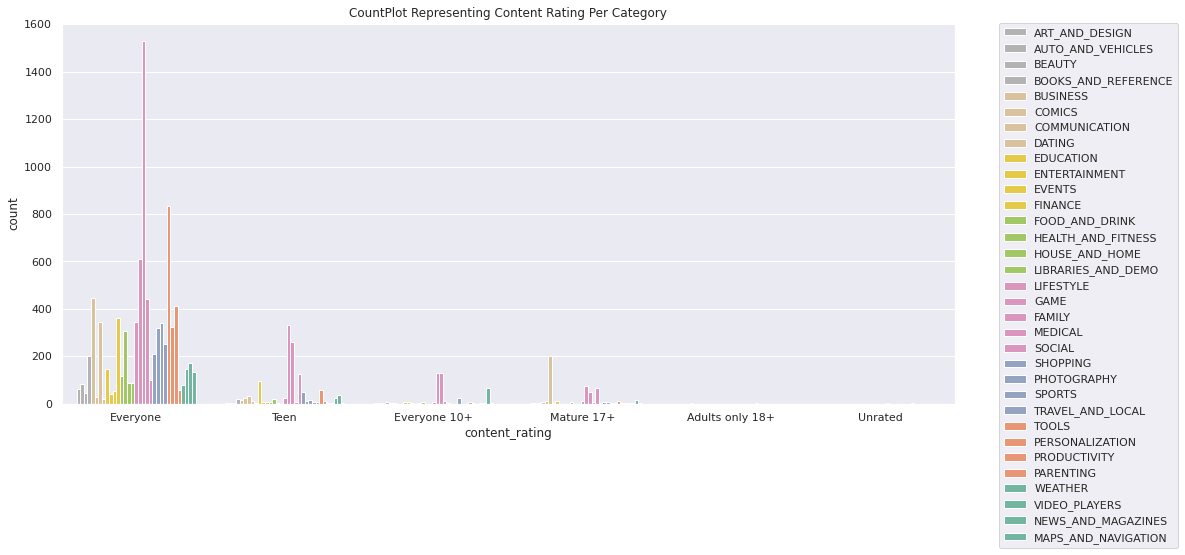

In [110]:
# countplot for content rating
sns.countplot(x=play_store_df.content_rating,data=play_store_df,hue=play_store_df.category,palette='Set2_r')
plt.title("CountPlot Representing Content Rating Per Category")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


### A count plot is a kind of like a histogram or a bar graph for some categorical area. It simply shows the number of occurrences of an item based on a certain type of category.
### Content rating is another feature available in the given google play store data set.
### Content rating describes the minimum maturity of content inside the applications. But doesn’t tells that application is designed for a specific age group. We used the count plot to understand the content rating for each category.
### Most of the applications on google play is having a content rating for everyone. However, only the dating category is for the mature 17+ age group.

In [111]:
# Grouby category and summing the price 
price_per_category=play_store_df.groupby('category',as_index=True)['price'].sum().reset_index()

In [112]:
# Applying lambda function for proper formatting upto 1 float point decimal of price values.
price_per_category['price']=price_per_category['price'].apply(lambda x: "{0:1.1f}$".format(x))

In [113]:
# Plotting bar plot using plotly.
px.bar(data_frame=price_per_category,x='category',y='price',text='price',title='Price per category in dollars')

### One can clearly understand that applications from the category finance have high price than any others, family category applications are second high priced applications, at third we have lifestyle category applications and at last, we have medical category applications, these four categories application charges high price when compared with others.

In [114]:
# Calculating number of applications available in each category and storing it in variable categories.
categories=play_store_df['category'].value_counts().reset_index()

In [115]:
# Resetting the names of columns here
categories.set_axis(['category','count'],axis=1,inplace=True)

In [116]:
# Plotting a bar plot representing the total count of applications in each category using plotly.
px.bar(data_frame=categories,x=categories['category'],y=categories['count'],text="count",title='Total Number of Application Per Category')


### The above count plot is the evidence that category family has the most number of applications available on the google play store, and very few apps are available for the category beauty and parenting. What I believe that beauty comes from inside and parenting should be come as naturally as possible.

In [117]:
# Category with the Most Reviews:
most_reviewed_category=play_store_df.groupby('category',as_index=False)['reviews'].sum()  

In [118]:
# Calculating total number of reviews in entire given google play store data set storing it into total reviews variable
total_reviews=play_store_df['reviews'].sum()

In [119]:
# Calculating percentage review and creating a new column for that.
most_reviewed_category['percentage_review']=most_reviewed_category['reviews']*100/total_reviews

In [120]:
# Applying lambda function for proper formatting on newly created percentage review column
most_reviewed_category['percentage_review']=most_reviewed_category['percentage_review'].apply(lambda x: "{0:1.2f}%".format(x))

In [121]:
# Plotting a bar plot using plotly to find out which category has most reviews and which category has least
most_reviewed=px.bar(data_frame= most_reviewed_category, x = most_reviewed_category.category, y = most_reviewed_category.reviews,title='Most Reviewed Category in Percentage Reviews',text="percentage_review")
most_reviewed


### As we can check gaming category have highest percentage reviews, The second highly reviewed category is communication. For events category there are almost no reviews, second least reviewed category beauty

In [122]:
# Category with the most space required we are talking about size of application available in the each category:
most_space_required_category=play_store_df.groupby('category',as_index=False)['size'].sum().sort_values(by='size',ascending=False)

In [123]:
# Total size in entire given google play store data set
total_size=play_store_df['size'].sum()

In [124]:
#calculating the percentage size and creating a new column inside most space required category dataframe
most_space_required_category['percentage_space_required']=most_space_required_category['size']*100/total_size

In [125]:
# Applying lambda function for proper formatting on newly created percentage space required column.
most_space_required_category['percentage_space_required']=most_space_required_category['percentage_space_required'].apply(lambda x: "{0:1.2f}%".format(x))

In [126]:
# Plotting a bar plot using plotly to know which categories of application takes most space inside the google play store
px.bar(data_frame=most_space_required_category,x=most_space_required_category.category,y=most_space_required_category['size'],title="Most Space Required Category",text='percentage_space_required')

### The conclusion is that Family apps consume most space in google play store out 100% space, they hold 26.37% space, and the second most space-consuming category is games. This means that the volume of application that are belongs to family and game category is way higher compared to other categories.

In [127]:
# Best category in terms of installation
most_installed_category=play_store_df.groupby("category",as_index=False)['installs'].sum()   

In [128]:
# Calculating the total installs in entire given play store data set
total_installs=play_store_df['installs'].sum()

In [129]:
# Creating a dataframe for categories alongwith their number of installs
unique_category=play_store_df.groupby('category',as_index=False)['installs'].sum()

In [130]:
# Creating a new column percentage intalls 
unique_category['percentage_installs']=unique_category['installs']*100/total_installs

In [131]:
# Applying lambda function for proper formatting of values inside percentage installs upto 1 float point decimal
unique_category['percentage_installs']=unique_category['percentage_installs'].apply(lambda x: "{0:1.2f}%".format(x))

In [132]:
# Plotting bar plot using plotly to find out the percentage installs of each category, here color parameter i have added for understanding the range of number of installs.
px.bar(data_frame=unique_category,x=unique_category.category,y=unique_category.installs,text='percentage_installs',color='installs',title='Most Installed Category in Percentage Installs')


### On the right-hand side of the above bar plot, there is scale available installs, which we can relate with the heatmap correlation scale, It's interesting right, Now we can easily interpret that the game category has the highest percentage of installs that is 20.93% around 21% and second highest is communication have 19.48% percentage installs.

### After performing all of the above three tasks on each category on the basis of reviews, space required, and installation. we can dominantly conclude that the apps that belong to the gaming category have the highest reviews and installation. While applications that belong to the family category consume high space compare to other categories on the google play store. We can figure out that the second-highest installation is happening for the category of communication, people are working on their communication skills that' great to know!

In [133]:
# Let's check the number of installation according category type
category_type_wise_installs=play_store_df.groupby(['category','type'],as_index=False)['installs'].sum()

## There are two main type category one is free and another one is paid, So we want to know which category of applications people prefers to use.

In [134]:
# Checking the head of category type wise installs dataframe
category_type_wise_installs.head(4)

category  type   installs
0     ART_AND_DESIGN  Free  124322100
1     ART_AND_DESIGN  Paid      16000
2  AUTO_AND_VEHICLES  Free   53080061
3  AUTO_AND_VEHICLES  Paid      50150

### As we can see There is a huge difference between free category installs and paid category installs, if we plot this we might end up with something inappropriate conclusion, so it leads us to use the np.log2 function which converts complex input into a proper scale.

In [135]:
# Converting installs into a suitable scale using np.log2
category_type_wise_installs['log2_installs']=np.log2(category_type_wise_installs['installs'])

In [136]:
# Now we can see that installs look preety drawable.
category_type_wise_installs.head(4)

category  type   installs  log2_installs
0     ART_AND_DESIGN  Free  124322100      26.889508
1     ART_AND_DESIGN  Paid      16000      13.965784
2  AUTO_AND_VEHICLES  Free   53080061      25.661667
3  AUTO_AND_VEHICLES  Paid      50150      15.613962

In [137]:
# Apply lambda function to convert into a proper format
category_type_wise_installs['log2_installs']=category_type_wise_installs['log2_installs'].apply(lambda x: "{0:1.1f}".format(x))

In [138]:
# Plotting plotly bar plot so as to understand category type effect on number of installs
px.bar(data_frame=category_type_wise_installs,x="category",y='log2_installs',text='log2_installs',color='type',title="Bar Plot Representing Category Type Effect on installation Numbers")


### Obiviously from above barplot, apps that are belongs to type free have more installation rate than that of paid, So people are more willing to go with free applications

In [139]:
# Now let's see will size of the application affect the installation rate
category_size_installs=play_store_df.groupby(['type','size'],as_index=False)['installs'].sum()
category_size_installs['log2_installs']=np.log2(category_size_installs['installs'])

In [140]:
category_size_installs['log2_installs']=category_size_installs['log2_installs'].apply(lambda x: "{0:1.1f}".format(x))

In [141]:
# Let's plot it by using scatter plot
px.scatter_3d(data_frame=category_size_installs,x='size',y='log2_installs',z='type',color='type')

### We can draw a conclusion by observing and visualizing to above scatter plot. Whether the application belongs to free type or paid type. Most of the customers on google play store prefers to install, small size application. Most installation rates can be observed between the application size 0 to 20 MB.

In [142]:
# Let's how 2D_scatter plot will look.
px.scatter(data_frame=category_size_installs,x='size',y='log2_installs',color='type',title="ScatterPlot Representing the Size and Category Type Effect on Number of Installations")

### By pointing the cursor we can explore each and every point in scatter plot using plotly, that's the only reason to use plotly, anyway i need to find out the ways to share these interactive graph in powerpoint. Even though size got increased in free category people are ok with that, as we can see in above scatter plot, people still downloading more free type application that has big size compared to paid application with big size.

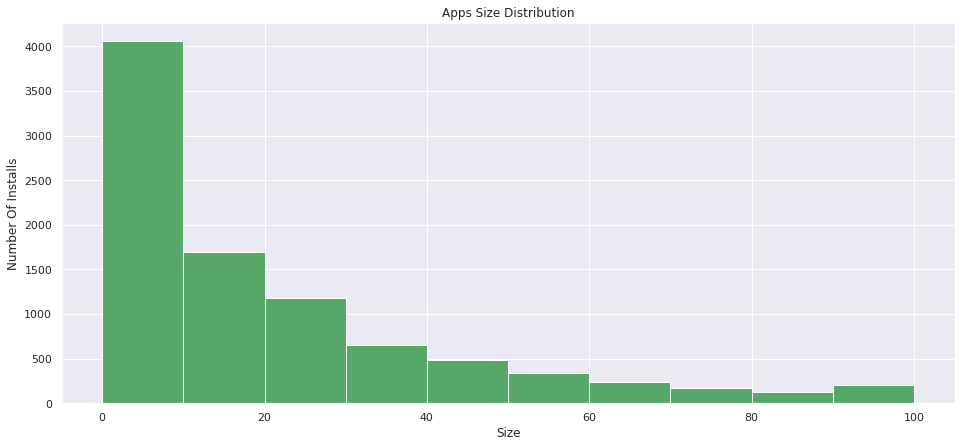

In [143]:
# We can analize this fact that people often install less size application with the help of below histogram.
plt.hist(play_store_df['size'],color='g')
plt.xlabel('Size')
plt.ylabel("Number Of Installs")
plt.title("Apps Size Distribution")
plt.show()

### In scatter, and barplot before this histogram we were using np.log2() function on install rate calculation but here in histogram you can experience a true scale, people usually more interested to install an application of small size.

In [144]:
# Let's check which factor has the great correlation with each other in our google play store data
play_store_df.corr()

rating   reviews      size  installs     price
rating    1.000000  0.063281  0.069440  0.047811 -0.020100
reviews   0.063281  1.000000  0.238215  0.643122 -0.009667
size      0.069440  0.238215  1.000000  0.164787 -0.023006
installs  0.047811  0.643122  0.164787  1.000000 -0.011689
price    -0.020100 -0.009667 -0.023006 -0.011689  1.000000

### Opps! It puzzling my mind to find out the correlation just looking at it, anyway I understand that there are only five features are correlated. I have great plan let's visulize it by seaborn heatmap

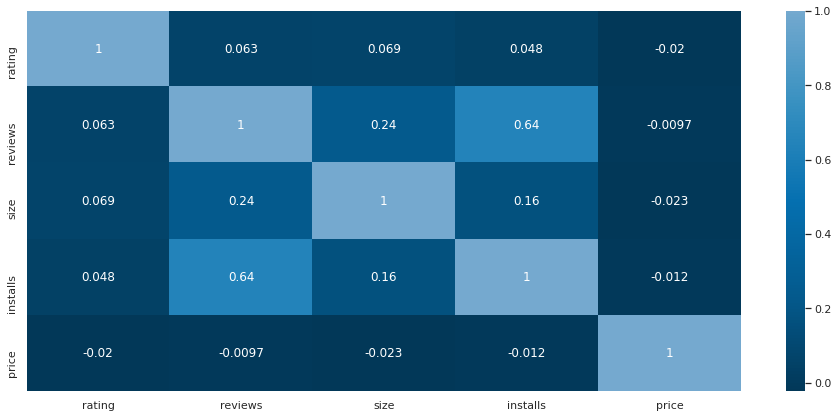

In [145]:
# Let's see it 
sns.heatmap(play_store_df.corr(),annot=True,cmap='PuBu_r',center=True,cbar=True)
plt.show()

### At this moment in time, I'm pretty much confident to say that firstly reviews and installs are highly correlated with each other, secondly, reviews and size are highly correlated. Thirdly reviews are correlated with size, This is what I'm getting from the above heatmap.


### Now we have data of reviews given by the end-users, so we will be trying to extract some useful insights from reviews data. The same process we will be following as we followed till now!

In [146]:
# Defining a directorial path for user review csv
user_path="/content/drive/MyDrive/Almabetter Project/Capstone - Projects/Module 1/Play Store App Review - Umesh Rathod"

In [147]:
# Reading out the data
user_review_df=pd.read_csv(user_path+ "/User Reviews.csv")

In [148]:
# Replacing the spaces between column names with underscore and converting all of then to lowercase
user_review_df.columns=[str(x).lower().replace(" ","_") for x in user_review_df.columns]

In [149]:
# Merging user reviews df with play store df on the basis of common feature app
merged_df1=play_store_df.merge(user_review_df,on='app')

In [150]:
# Checking the head of merged df
merged_df1.head(2)

app  ... sentiment_subjectivity
0  Coloring book moana  ...               1.000000
1  Coloring book moana  ...               0.833333

[2 rows x 15 columns]

In [151]:
# Printing the shape of the merged df
print(f"The shape of the merged_df is {merged_df1.shape}. It has {merged_df1.shape[0]} row labels and {merged_df1.shape[1]} features")

The shape of the merged_df is (122662, 15). It has 122662 row labels and 15 features


### The shape google play store data frame was the (10840,13). Now we have merged the user reviews data frame on the app feature. So now we can see that we have four new columns inside the merged data frame. I need to understand the meaning of this feature first
### Sentiment: It is emotion, feeling, opinion, a view that is held or expressed. It could be critical to analysis sometimes. Sentiment determines the attitude of writer's whether it is positive, negative, or neutral
### Sentiment Polarity: Sentiment polarity is a float value ranging from a negative one to a positive one.
### i.e range (-1, 1, dtype=float) where -1 means negative statement 1 means positive statement
### Sentiment Subjectivity: Sentiment Subjectivity refers to personal emotion, opinion, views, or judgment. Subjectivity Sentiment ranges from 0 to 1 where 0 is most objective and 1 is more subjective.

In [152]:
# checking the information about merged dataframe.
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   app                     122662 non-null  object        
 1   category                122662 non-null  object        
 2   rating                  122662 non-null  float64       
 3   reviews                 122662 non-null  int64         
 4   size                    75432 non-null   float64       
 5   installs                122662 non-null  int64         
 6   type                    122662 non-null  object        
 7   price                   122662 non-null  float64       
 8   content_rating          122662 non-null  object        
 9   genres                  122662 non-null  object        
 10  last_updated            122662 non-null  datetime64[ns]
 11  translated_review       72605 non-null   object        
 12  sentiment               72615 

In [153]:
# Checking how many null values are present inside the dataframe.
merged_df1.isnull().sum()

app                           0
category                      0
rating                        0
reviews                       0
size                      47230
installs                      0
type                          0
price                         0
content_rating                0
genres                        0
last_updated                  0
translated_review         50057
sentiment                 50047
sentiment_polarity        50047
sentiment_subjectivity    50047
dtype: int64

In [154]:
# Dropping the null values inside the data frame
merged_df1.dropna(axis=0,inplace=True)

In [155]:
# Checking the head of the merged dataframe
merged_df1.head(3)

app  ... sentiment_subjectivity
0  Coloring book moana  ...               1.000000
1  Coloring book moana  ...               0.833333
2  Coloring book moana  ...               0.000000

[3 rows x 15 columns]

In [156]:
# Rechecking for the null values if any
merged_df1.isnull().sum().any()

False

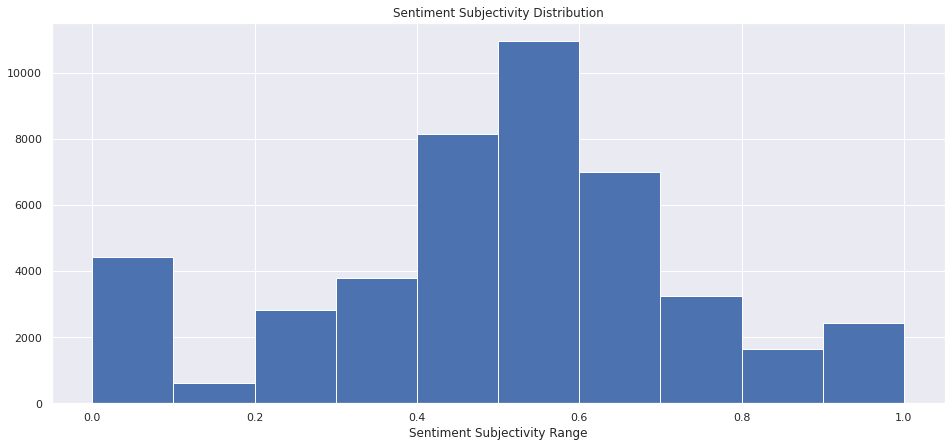

In [157]:
# Plotting the histogram representing the sentiment subjectivity distribution
plt.hist(merged_df1[~merged_df1['sentiment_subjectivity'].isna()]['sentiment_subjectivity'])
plt.title("Sentiment Subjectivity Distribution")
plt.xlabel("Sentiment Subjectivity Range")
plt.show()

### From above distribution of subjectivity it can be conclude that Most possible sentiment subjectivity ranges from 0.4 to 0.7. So it can be stated that customers gives reviews as per their experience with service of the applications.